# <center>Praca domowa 2</center>
### <center>Kodowanie zmiennych kategorycznych i uzupełnienie braków<br>Paweł Koźmiński<br>21 marca 2020r.</center>


## 1. Wczytanie potrzebnych bibliotek oraz danych

In [1]:
import pandas as pd
import numpy as np
import sklearn

# 68MB
data = pd.read_csv("~/Downloads/allegro-api-transactions.csv")
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [3]:
print("Liczba unikalnych wartości pola it_location: " + str(len(data.it_location.unique())))

Liczba unikalnych wartości pola it_location: 10056


#### Od razu widać jaka jest przewaga target end=coding nad one-hot - druga metoda spowodowałaby stworzenie ponad 10000 nowych kolumn

## 2. Target encoding zmiennej it_location

In [4]:
data.it_location

0                    Warszawa
1                    Warszawa
2                      Leszno
3         Wola Krzysztoporska
4                   BIAŁYSTOK
                 ...         
420015                Kraśnik
420016            Dzierżoniów
420017                Supraśl
420018                 Poznań
420019                  Pszów
Name: it_location, Length: 420020, dtype: object

In [5]:
import category_encoders
te = category_encoders.target_encoder.TargetEncoder(data)
target_encoded = te.fit_transform(data.it_location, data.price)
data.it_location = target_encoded

In [6]:
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,85.423398,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,85.423398,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,61.990914,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,117.191956,"Odzież, Obuwie, Dodatki"


In [7]:
data.it_location.head()

0     85.423398
1     85.423398
2     61.990914
3     35.433365
4    117.191956
Name: it_location, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  float64
 13  main_category           420020 non-null  object 
dtypes: float64(2), int64

#### Po wykonaniu target encodingu zmienna it_location jest typu float

## 3. One hot encoding kolumny main_category

In [9]:
print("Liczba unikalnych wartości kolumny main_category: " + str(len(data.main_category.unique())))

Liczba unikalnych wartości kolumny main_category: 27


In [10]:
from sklearn.preprocessing import OneHotEncoder


oe = OneHotEncoder(sparse=False)
mc = data["main_category"].to_numpy().reshape(len(data["main_category"]), 1)
new_part = pd.DataFrame(oe.fit_transform(mc), columns=(sorted("mc_" + data.main_category.unique())))


# Sprawdźmy popraność kodowania poszczególnych wartości main_category:
for vals in data.main_category.unique():
    x = data.main_category == vals
    y = new_part[["mc_"+vals]] == 1
    print(vals + ": " + str((y[["mc_"+vals]].squeeze() == x).all()))

Komputery: True
Odzież, Obuwie, Dodatki: True
Dom i Ogród: True
Książki i Komiksy: True
Biżuteria i Zegarki: True
RTV i AGD: True
Motoryzacja: True
Dla Dzieci: True
Uroda: True
Telefony i Akcesoria: True
Sport i Turystyka: True
Delikatesy: True
Kolekcje: True
Gry: True
Rękodzieło: True
Zdrowie: True
Przemysł: True
Filmy: True
Fotografia: True
Biuro i Reklama: True
Instrumenty: True
Muzyka: True
Konsole i automaty: True
Sprzęt estradowy, studyjny i DJ-ski: True
Antyki i Sztuka: True
Bilety: True
Nieruchomości: True


In [11]:
new_part.head()

,mc_Antyki i Sztuka,mc_Bilety,mc_Biuro i Reklama,mc_Biżuteria i Zegarki,mc_Delikatesy,mc_Dla Dzieci,mc_Dom i Ogród,mc_Filmy,mc_Fotografia,mc_Gry,...,mc_Nieruchomości,"mc_Odzież, Obuwie, Dodatki",mc_Przemysł,mc_RTV i AGD,mc_Rękodzieło,mc_Sport i Turystyka,"mc_Sprzęt estradowy, studyjny i DJ-ski",mc_Telefony i Akcesoria,mc_Uroda,mc_Zdrowie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Następnie należałoby odpowiednio połączyć ramki danych

## 4. CatBoost Encoder

Przypomnijmy jak wygląda nasza ramka danych:

In [12]:
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,85.423398,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,85.423398,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,61.990914,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,117.191956,"Odzież, Obuwie, Dodatki"


In [13]:
cbe = category_encoders.cat_boost.CatBoostEncoder(cols = ["main_category"])
h = cbe.fit_transform(data, data.price)
h.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,85.423398,76.811350
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,85.423398,76.811350
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,61.990914,76.811350
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,76.811350
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,117.191956,40.855675


Wydawać by się mogło, że wiele z wartości zmiennej main_category powtarza się wielokrotnie. Jest to jednak nieprawda, jak zobaczymy tylko niewielki ułamek to wartości dublujące się:

In [14]:
print("Wartości dublujące się stanowią " + str(100*(1 - float(len(h.main_category.unique()))/len(h))) + "%.")

Wartości dublujące się stanowią 0.006666349221462475%.


#### Krótki opis działania algorytmu:

Idea działania algorytmu kodowania zmiennych kategorycznych CatBoost jest podobna do Target Encodingu, wartości są zastępowane odpowiednimi średnimi zmiennej objaśnianej, jednakże w celu ustrzeżenia się przed outlierami, nie jest uwzględniana wartość z danego wiersza. Dodatkowo, CatBoost encoder wykonuje te operacje w locie, dlatego te wartości stale się zmieniają. Jak się domyślam, w pierwszych wierszach brana jest średnia z wszystkich obserwacji:

In [15]:
print(data.price.mean())
#tak

76.81135036426836


## 5.Ordinal

In [16]:
ord = category_encoders.ordinal.OrdinalEncoder(cols = ["main_category"])
ord.fit(data)
ordinaled = ord.transform(data)
ordinaled

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,85.423398,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,85.423398,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,61.990914,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,117.191956,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,24.306929,6
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,66.785334,9
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,18.682800,2
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,106.203076,8


#### Krótki opis działania algorytmu:

Jest to jedna z prostszych metod. W przypadku niepodania konkretnego sposobu mapowania, kolejnym wartościom przypisywane są kolejne liczby całkowite. Dla braku danych również przypisana jest specjalna wartość. 

## 6. Uzupełnianie braków

In [17]:
numdata = data[["price", "it_quantity", "it_seller_rating"]]
numdata.head()

,price,it_quantity,it_seller_rating
0,59.99,997,50177
1,4.90,9288,12428
2,109.90,895,7389
3,18.50,971,15006
4,19.90,950,32975


## 7. Multivariate feature imputation
#### Usunięte 10% wartości it_seller_rating

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
import math
itimp = IterativeImputer(max_iter=10)


In [19]:
import random
RMSE = []
for i in range(10):
    numdata = data.copy()
    numdata = numdata[["price", "it_quantity", "it_seller_rating"]]
    assert ~pd.isna(numdata).any().any()  # sprawdzenie czy nie ma brakujacych wartosci
    indx = random.sample(range(len(numdata)), int(len(numdata.price)/10)) #losowanie 10% indeksów
    assert len(np.unique(indx)) == len(indx) #czy na pewno losowanie odbywalo sie bez zwracania aby bylo 10%?
    cut_values = numdata.loc[indx, "it_seller_rating"] # zapisanie wartosci ktore zostana usuniete
    numdata.loc[indx, "it_seller_rating"] = np.nan #usuniecie wartosci
    no_na = numdata[~pd.isna(numdata.it_seller_rating)]
    only_na = numdata[pd.isna(numdata.it_seller_rating)]
    itimp.fit(no_na) #imputacja - model
    IterativeImputer()
    i = itimp.transform(only_na)
    RMSE.append(math.sqrt(mean_squared_error(cut_values, pd.DataFrame(i).iloc[:, 2])))

In [20]:
RMSE

[37290.09454378751,
 36754.0674015476,
 36473.444594164444,
 36685.119834970224,
 36648.4111076849,
 36359.90026116588,
 37130.60517968611,
 36635.65776643414,
 36716.68038723565,
 36362.8019552315]

## 8. Usunięcie 10% wartości it_seller_rating oraz it_quantity

In [39]:
RMSE2 = []
for i in range(10):
    numdata = data[["price", "it_quantity", "it_seller_rating"]].copy()
    assert ~pd.isna(numdata).any().any()  # sprawdzenie czy nie ma brakujacych wartosci
    indx = random.sample(range(len(numdata)), int(len(numdata.price)/10)) #losowanie 10% indeksów
    indx2 = random.sample(range(len(numdata)), int(len(numdata.price)/10)) #losowanie 10% indeksów dla 2. kolumny
    assert len(np.unique(indx)) == len(indx) #czy na pewno losowanie odbywalo sie bez zwracania aby bylo 10%?
    assert len(np.unique(indx2)) == len(indx2) 
    cut_values = numdata.loc[indx, "it_seller_rating"] # zapisanie wartosci ktore zostana usuniete
    numdata.loc[indx, "it_seller_rating"] = np.nan #usuniecie wartosci
    numdata.loc[indx2, "it_quantity"] = np.nan #usuniecie wartosci
    assert len(indx)>(0.05*len(numdata)) 
    assert len(indx2)>(0.05*len(numdata))
    assert sum(pd.isna(numdata.it_seller_rating)) == len(indx) #sprawdzenie czy usuwanie wartości się powiodło
    assert sum(pd.isna(numdata.it_quantity)) == len(indx2)
    no_na = numdata[~pd.isna(numdata.it_seller_rating)]
    only_na = numdata[pd.isna(numdata.it_seller_rating)]
    itimp.fit(no_na) #imputacja - model
    IterativeImputer()
    i = itimp.transform(only_na)
    RMSE2.append(math.sqrt(mean_squared_error(cut_values, pd.DataFrame(i).iloc[:, 2])))

In [40]:
RMSE2

[36749.99077399491,
 36943.2237138809,
 36002.98153584693,
 37191.705273252075,
 36929.243723610576,
 36380.982131370154,
 36896.7446867001,
 36919.56765949792,
 36579.15562111057,
 36448.71678705094]

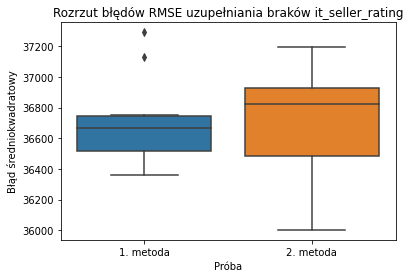

In [55]:
import seaborn as sns
rmses = pd.DataFrame({"Błąd średniokwadratowy": RMSE+RMSE2})
rmses.loc[0:10, "Próba"] = "1. metoda"
rmses.loc[10:20, "Próba"] = "2. metoda"
p1 = sns.boxplot(x = "Próba", y = "Błąd średniokwadratowy", data = rmses)
p1.set_title("Rozrzut błędów RMSE uzupełniania braków it_seller_rating")
p1

In [70]:
err = pd.DataFrame({"1. metoda": RMSE, "2. metoda": RMSE2})

In [71]:
err.describe()

,1. metoda,2. metoda
count,10.000000,10.000000
mean,36705.678303,36704.231191
std,302.624068,350.884085
min,36359.900261,36002.981536
25%,36513.997887,36481.326496
50%,36666.765471,36823.367730
75%,36744.720648,36926.824708
max,37290.094544,37191.705273


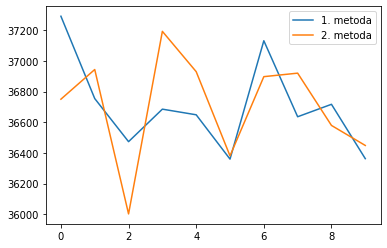

In [62]:
from matplotlib import pyplot
err.plot()

#### Powyższe wykresy wskazują, że trudno jednoznacznie określić czy usunięcie części wartości kolumny it_quantity negatywnie wpłynęło na szacowanie wartości it_seller_rating. Z pewnością większy był wówczas rozrzut błędów (odchylenie standardowe: 303 v 351),  jednak minialny błąd wystąpił w drugim przypadku testowym, a maksymalny w pierwszym. Co ciekawe, średnia wartość błędu była zbliżona w obu przypadkach.